### Божнюк Александр Сергеевич, 271 группа
# Решение задачи теплопроводности.
# Задание 
Решить задачу теплопроводности, используя явную и неявную схему

${\dfrac {du}{dt}} = {\dfrac{d^2u}{dx^2}}$, $0\le x \le 1$,  $0 \le t \le 0.08$

$u(x,0) = {\dfrac {x^2}{2}}, 0 \le x \le 1$;    
$u(0,t)=t$;    
$u(1,t)=t+0.5, 0 \le t \le 0.08.$

In [72]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

In [73]:
def u_0(x):
    return x * x / 2

def u_1(t):
    return t

def u_2(t):
    return t + 0.5

## Явный метод

In [74]:
def explicit_solve(beg_x, end_x, beg_t, end_t, psx, pst):
    step_x = (end_x - beg_x) / psx
    step_t = (end_t - beg_t) / pst
    alpha = step_t / (step_x * step_x)
    u = np.zeros((psx, pst))
    x = np.linspace(beg_x, end_x, psx)
    t = np.linspace(beg_t, end_t, pst)
    for i, x_i in enumerate(x):
        u[i][0] = u_0(x_i)
    for j, t_j in enumerate(t):
        u[0,j] = u_1(t_j)
        u[psx - 1, j] = u_2(t_j)
    for j in range(pst - 1):
        for i in range(1, psx - 1):
            u[i, j+1] = u[i,j] * (1-2 * alpha) + alpha * (u[i-1, j] + u[i+1, j])

    return np.transpose(u), x, t 

Построим график $u(x,t)$

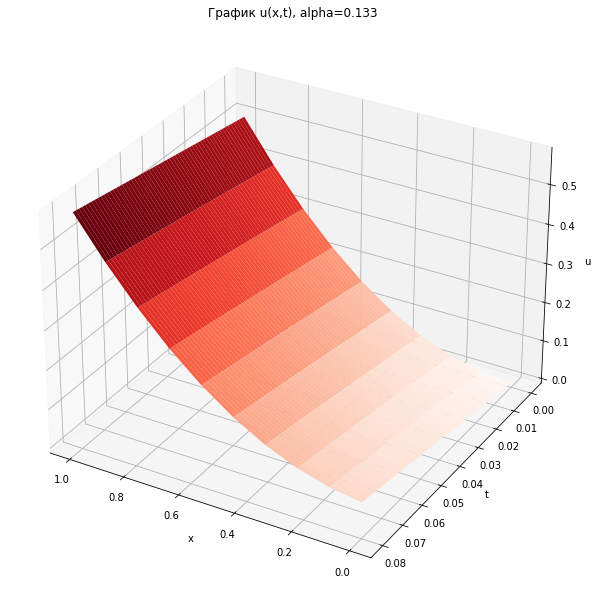

In [75]:
u,x,t = explicit_solve(0, 1, 0, 0.08, 10, 60)
X, T = np.meshgrid(x,t)
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = plt.axes(projection="3d")
ax.view_init(30,120)
ax.plot_surface(X, T, u, rstride=1, cstride=1, cmap='Reds', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
step_t = (0.08 - 0) / 60
step_x = (1 - 0) / 10
plt.title(f'График u(x,t), alpha={round(step_t / (step_x ** 2), 3)}')
plt.show()

Метод сходится, так как $\alpha < 0.5.$  
Теперь изменим параметры, чтобы поменялось значение $\alpha$.

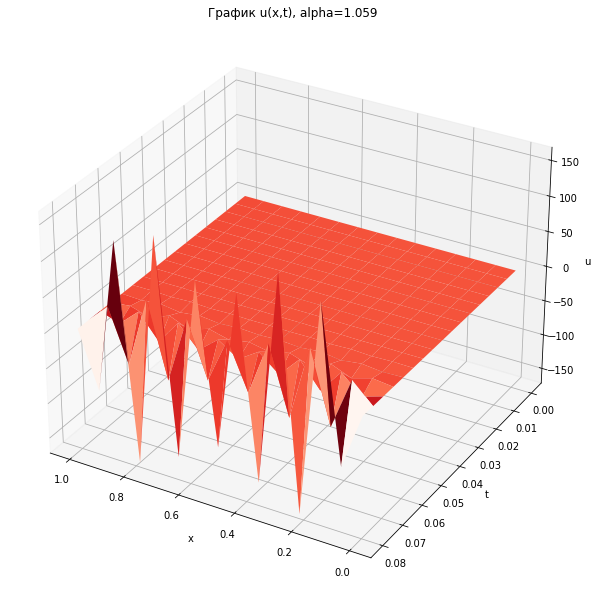

In [76]:
u,x,t = explicit_solve(0, 1, 0, 0.08, 15, 17)
X, T = np.meshgrid(x,t)
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = plt.axes(projection="3d")
ax.view_init(30,120)
ax.plot_surface(X, T, u, rstride=1, cstride=1, cmap='Reds', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
step_t = (0.08 - 0) / 17
step_x = (1 - 0) / 15
plt.title(f'График u(x,t), alpha={round(step_t / (step_x ** 2), 3)}')
plt.show()

Замечаем, что при $\alpha > 0.5$ устойчивость теряется.

## Неявный метод

### Метод прогонки

In [77]:
def solve_sweep(u_1, u_2, alpha, layer):
    points = len(layer)
    a = c = -alpha
    b = 1 + 2 * alpha
    ks = [u_1]
    ls = [0]
    ys = [u_2]
    for i in range (1, points - 1):
        d = a * ls[i-1]+b
        ls.append(-c/d)
        ks.append((-a * ks[i-1] + layer[i]) / d)
    for i in range(points - 2, 0, -1):
        ys.append(ys[points - 2 - i] * ls[i] + ks[i])
    ys.append(u_1)
    ys.reverse()
    return ys

### Сам неявный метод

In [78]:
def implicit_solve(beg_x, end_x, beg_t, end_t, psx, pst):
    step_x = (end_x - beg_x) / psx
    step_t = (end_t - beg_t) / pst
    alpha = step_t / (step_x * step_x)
    u = np.zeros((psx, pst))
    x = np.linspace(beg_x, end_x, psx)
    t = np.linspace(beg_t, end_t, pst)
    for i, x_i in enumerate(x):
        u[i][0] = u_0(x_i)
    for j, t_j in enumerate(t):
        u[0,j] = u_1(t_j)
        u[psx - 1, j] = u_2(t_j)
    for j in range(pst - 1):
        for i in range(1, psx - 1):
            u[:, j + 1] = solve_sweep(u[0, j+1], u[psx -1, j+1], alpha, u[:, j])

    return np.transpose(u), x, t 

Построим построить график при $\alpha = 0.133$

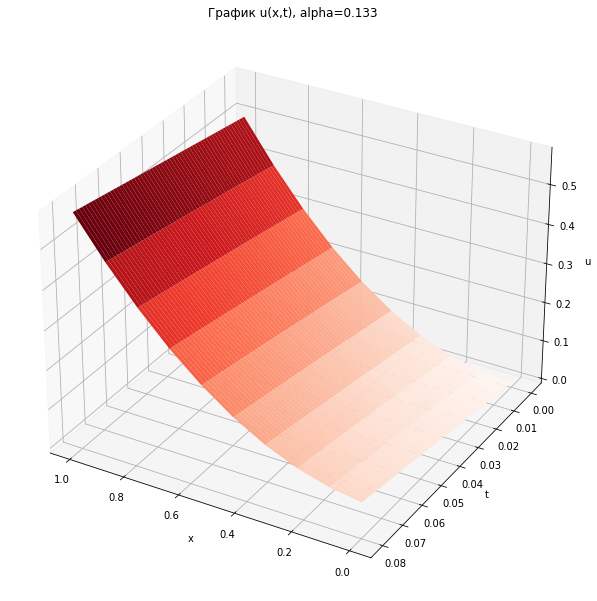

In [79]:
u,x,t = implicit_solve(0, 1, 0, 0.08, 10, 60)
X, T = np.meshgrid(x,t)
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = plt.axes(projection="3d")
ax.view_init(30,120)
ax.plot_surface(X, T, u, rstride=1, cstride=1, cmap='Reds', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
step_t = (0.08 - 0) / 60
step_x = (1 - 0) / 10
plt.title(f'График u(x,t), alpha={round(step_t / (step_x ** 2), 3)}')
plt.show()

Понятно, что при данном $\alpha = 0.133 < 0.5$ метод устойчив.  
Проверим, что будет при $\alpha > 0.5$.

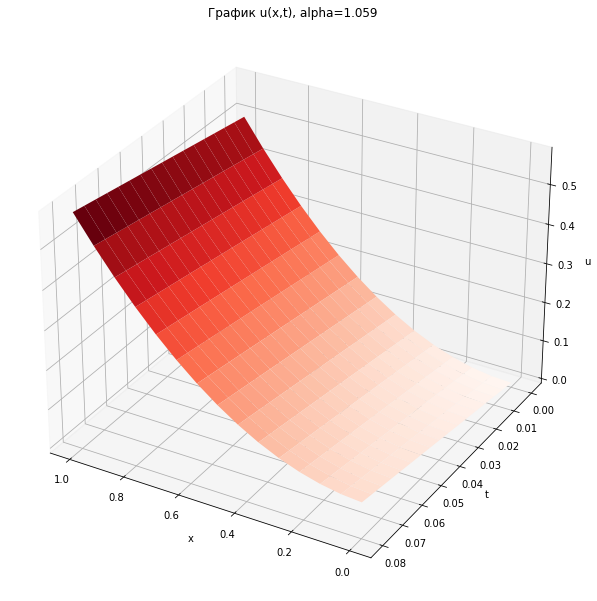

In [80]:
u,x,t = implicit_solve(0, 1, 0, 0.08, 15, 17)
X, T = np.meshgrid(x,t)
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = plt.axes(projection="3d")
ax.view_init(30,120)
ax.plot_surface(X, T, u, rstride=1, cstride=1, cmap='Reds', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
step_t = (0.08 - 0) / 17
step_x = (1 - 0) / 15
plt.title(f'График u(x,t), alpha={round(step_t / (step_x ** 2), 3)}')
plt.show()

Получаем устойчивость метода и при $\alpha > 0.5.$

## Вывод
Как и ожидалось, явная схема показывает устойчтивость только при $\alpha < 0.5.$  
Неявная же схема демонстрирует устойчивость и при $\alpha > 0.5.$ 